<a href="https://colab.research.google.com/github/Er-Devjyoti/GoodRead-Class-Project/blob/main/CS985_Goodreads_Rating_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS985-Goodreads Rating Classification Task.-Group

## Group 8: Devjyoti Das

### Dataset Description:
This dataset contains 900000 book reviews from about 25,475 books and 18,892 users , which is a review subset for spoiler detection, where each book/user has at least one associated spoiler review.
The ratings are from 1 to 5.

Files
my_goodreads_train.csv - the training set
my_goodreads_test.csv - the test set
my_goodreads_sample_submission.csv - sample submission file
Here are the columns of the dataset -

user_id - Id of user
book_id - Id of Book
review_id - Id of review
rating - rating from 1 to 5
review_text - review text
date_added - date added
date_updated - date updated
read_at - read at
started_at - started at
n_votes - no. of votes
n_comments - no. of comments

# Overview
In this project, we implemented deep learning to estimate the books' ratings based on their text reviews and in order to categorise the evaluations into various rating levels, 
we integrated the different models from the standard ML Baseline, 3 layer Neural Networks, Deep Neural Network and the Complex Neural Networks such as the GRU, LSTM, and BERT (a transformer) 
which are forms of Recurrent neural Networks. After splitting the data, we pre-processed the data to remove the irrelevant information for each model and then evaluated their functionality.
According to our research, the LSTM model performed better than every other model and this model is suggested for implementation in this activity. In order to improve performance, 
it is also advised to try further fine-tuning on said model.


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import pandas.compat
from pandas.compat import *
import keras
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
%load_ext tensorboard
import re
import string

In [ ]:
# Importing the datasets for drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("drive/MyDrive/mydata/my_goodreads_train.csv")
test = pd.read_csv("drive/MyDrive/mydata/my_goodreads_test.csv")

In [ ]:
test.head()

,Unnamed: 0,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,2212,11f7623a30dd3f47258dd9a4c806f6850,10439467,16c32b9bb0142734c60f8b028f281c5dd,"3-3.5 stars \n While I liked it, I didn't love...",Wed Oct 17 11:33:43 -0700 2012,Fri Feb 24 20:18:32 -0800 2017,Fri Feb 12 06:19:31 -0800 2016,Sat Feb 06 00:00:00 -0800 2016,1,0
1,655187,1b700c4dfcecf272a3d18fea04d1a7f3a,129377,1f86ec340856f1097c922d33aed48d4ea,"First, I must fangirl over the ending. *OMG FA...",Mon Mar 02 14:15:20 -0800 2015,Thu Jul 21 11:27:01 -0700 2016,Wed Apr 29 00:00:00 -0700 2015,Mon Apr 27 00:00:00 -0700 2015,0,0
2,483724,1ad43768c54d2c2c2da810cbf052a3fff,176699581,14a20b34f27611e45bd75e24de6a06324,Somewhere between 4 and 5 - really loved this ...,Fri Oct 11 06:44:58 -0700 2013,Sun Aug 03 06:38:24 -0700 2014,Wed May 07 00:00:00 -0700 2014,NaN,1,0
3,322858,1f9214ec05446de0b96d8fe550d994baf,17792372,1b2e5b069e4f440d152ae6d48e3f111ac,I'll admit it - I was not expecting to enjoy t...,Sat Apr 05 00:27:42 -0700 2014,Thu Apr 13 16:46:04 -0700 2017,Mon Nov 23 03:44:34 -0800 2015,Thu Nov 05 00:00:00 -0800 2015,0,0
4,393932,1071b2047c229084b25a0e1fd51e0c698,18499966,132aec4dfb13a2f8032a7431023dd728f,Book #25 of 2011 \n I didn't read the accompyi...,Mon Mar 07 15:06:31 -0800 2011,Mon Mar 07 15:12:36 -0800 2011,Tue Mar 01 00:00:00 -0800 2011,NaN,0,0


In [ ]:
test.shape

(200000, 11)

In [ ]:

data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,1da3dcc13cf360b9ecb06251e86237535,182091851,1c949b5dedf860514ec8b97ad158c9f4f,5,I thought this was a very good historical fant...,Fri Feb 01 16:44:16 -0800 2013,Tue Oct 25 18:49:25 -0700 2016,Sat May 04 00:00:00 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,5,6
1,1ae436441b6153473ef907aed1006a159,1451461,112ee86a20d7e4308c0a054f8b03128cd,5,I've had this book recommended to me more than...,Sun Nov 08 12:10:16 -0800 2015,Sun Nov 08 12:24:59 -0800 2015,Tue May 05 00:00:00 -0700 2015,Sun May 03 00:00:00 -0700 2015,0,0
2,1aa5e9d859b0c0737f4b99a07edf19c88,13483572,1253729b67f301b75a0f26e85f6d6fb31,5,Seriously! You go and throw that twist into th...,Wed Oct 10 02:07:19 -0700 2012,Sat Apr 27 00:40:19 -0700 2013,Sat Apr 27 00:40:19 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,0,0
3,1940c22aba67c3d49ccd37891c52c9f51,131585171,1ae0005e94dce0dc5c18d6ae2b4a329ab,4,Gosh!!! I'm still not recovering from the effi...,Thu Dec 05 00:45:29 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Wed Dec 04 00:00:00 -0800 2013,5,0
4,15e03534fccd0e7e1849d712ab9e44342,195643271,1d8357d2abdcc656635c5459c1feec761,3,"3.5 stars rounded down. I can't help it, I jus...",Wed Mar 15 18:08:14 -0700 2017,Wed Jul 05 12:55:32 -0700 2017,Wed Apr 12 12:17:07 -0700 2017,Tue Apr 11 00:00:00 -0700 2017,0,0


In [ ]:
data.shape

(700000, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       700000 non-null  object
 1   book_id       700000 non-null  int64 
 2   review_id     700000 non-null  object
 3   rating        700000 non-null  int64 
 4   review_text   700000 non-null  object
 5   date_added    700000 non-null  object
 6   date_updated  700000 non-null  object
 7   read_at       628588 non-null  object
 8   started_at    486589 non-null  object
 9   n_votes       700000 non-null  int64 
 10  n_comments    700000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 58.7+ MB


In [ ]:
data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,1da3dcc13cf360b9ecb06251e86237535,182091851,1c949b5dedf860514ec8b97ad158c9f4f,5,I thought this was a very good historical fant...,Fri Feb 01 16:44:16 -0800 2013,Tue Oct 25 18:49:25 -0700 2016,Sat May 04 00:00:00 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,5,6
1,1ae436441b6153473ef907aed1006a159,1451461,112ee86a20d7e4308c0a054f8b03128cd,5,I've had this book recommended to me more than...,Sun Nov 08 12:10:16 -0800 2015,Sun Nov 08 12:24:59 -0800 2015,Tue May 05 00:00:00 -0700 2015,Sun May 03 00:00:00 -0700 2015,0,0
2,1aa5e9d859b0c0737f4b99a07edf19c88,13483572,1253729b67f301b75a0f26e85f6d6fb31,5,Seriously! You go and throw that twist into th...,Wed Oct 10 02:07:19 -0700 2012,Sat Apr 27 00:40:19 -0700 2013,Sat Apr 27 00:40:19 -0700 2013,Thu Apr 25 00:00:00 -0700 2013,0,0
3,1940c22aba67c3d49ccd37891c52c9f51,131585171,1ae0005e94dce0dc5c18d6ae2b4a329ab,4,Gosh!!! I'm still not recovering from the effi...,Thu Dec 05 00:45:29 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Thu Dec 05 00:50:17 -0800 2013,Wed Dec 04 00:00:00 -0800 2013,5,0
4,15e03534fccd0e7e1849d712ab9e44342,195643271,1d8357d2abdcc656635c5459c1feec761,3,"3.5 stars rounded down. I can't help it, I jus...",Wed Mar 15 18:08:14 -0700 2017,Wed Jul 05 12:55:32 -0700 2017,Wed Apr 12 12:17:07 -0700 2017,Tue Apr 11 00:00:00 -0700 2017,0,0


In [ ]:
# Working with the relevant attributes
data1 = pd.concat([data.review_text, test.review_text], axis=0)
data1.shape

(900000,)

In [ ]:
data1 = pd.DataFrame(data1)
data1

,review_text
0,I thought this was a very good historical fant...
1,I've had this book recommended to me more than...
2,Seriously! You go and throw that twist into th...
3,Gosh!!! I'm still not recovering from the effi...
4,"3.5 stars rounded down. I can't help it, I jus..."
...,...
199995,** sp01l3r al3rt ** \n I reeeeeally liked CoLS...
199996,"I do like this book, although, like many other..."
199997,Eh. Read my full review at http://yalitwit.blo...
199998,I really liked this book! I was angry with som...


In [ ]:
# transformation of the data into numerical representations, using the ContentVectorizer and the TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data1.review_text)
X_train_counts.shape

(900000, 295944)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(900000, 295944)

In [ ]:
train_data = X_train_tf[:700000, :]
train_data.shape

(700000, 295944)

In [ ]:
test_data = X_train_tf[700000:, :]
test_data.shape

(200000, 295944)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, data.rating, test_size = 0.285714, random_state=40)

In [ ]:
x_train.shape

(500000, 295944)

In [ ]:
y_train.shape

(500000,)

In [ ]:
x_val.shape

(200000, 295944)

In [ ]:
y_val.shape

(200000,)

# Method
It was noted that some spoilers that could potentially affect the accuracy of our models were were in the reviews. Therefore, it was needed to consider excluding such reviews 
or developing a way to detect and handle them appropriately and so before the texts were cleaned by removing contents like punctuation and stop words, we first pre-processed 
the data by eliminating any extraneous characters like emojis and URLs. The text was then transformed into numerical representations using the CountVectorizer and TfidfTransformer routines.
The “train_test_split” method from scikit-learn is employed to randomly perform a 2-way split (splitting the original dataset into training and validation sets) as the test set 
is available separately to avoid the production of Bias estimates. The method was run on the data for the generation of a validation set for testing our models. A test size of  
a value of exactly “0.285714” was employed to have a training set of 500,000 and a validation of 200,000 rows (which will also be the same with the test size) and this set “test_size” 
kept consistent among the models.

.

Four different sections were implemented

i. A typical Machine Learning algorithm

ii. A 3 layer Neural Network

iii. A deep NN with various layer sizes

iv. Complex Models containing GRU, BERT and LSTM


.

The Multinomial Naive Bayes and SGD Classifier were applied for the common ML algorithm. We constructed the model for the 3-layer NN using the Keras library and modified the neurons 
in the hidden layer. We changed the number of hidden layers and the kind of activation function employed in each layer for the deep NN. The complex Recurrent Neural Network Algorithms
such as the LSTM, GRUs, and BERT models were then applied to also make predictions on the ranking of the books based on their text reviews.

## Standard ML Model

We have used the Multinomial Naive Bayes algorithm and SGD Classifier as our baseline models which give a validation accuracy of 0.41 and 0.48 respectively.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Applying the Stanndared 2 ML models 

# Importing MultinomialNB from sklearn's naive_bayes module and creating an instance of it
from sklearn.naive_bayes import MultinomialNB
ml1 = MultinomialNB()
ml1.fit(x_train, y_train)
predict1 = ml1.predict(x_val)
acc1 = accuracy_score(y_val, predict1)
print(acc1)

0.406525


In [ ]:
# Importing SGDClassifier from sklearn's linear_model module and creating an instance of the SGDClassifier model

from sklearn.linear_model import SGDClassifier
ml2 = SGDClassifier()
ml2.fit(x_train, y_train)
predict2 = ml2.predict(x_val)
acc2 = accuracy_score(y_val, predict2)
print(acc2)

0.481175


In [ ]:
# SGDClassifier was observed to perform better as confirmed in the metrics

# 3-layer Neural Network Baseline Model


With varying numbers of neurons in the hidden layer, we built a three-layer NN. With a batch size of 128 over 30 iterations, using 100 neurons for the hidden layer. Eventually,a value of ___ for the training accuracy and ___ for the validation accuracy was the outcome.

In [ ]:
# Here we had to pre-processed the data by eliminating any extraneous characters like emojis and URLs using the emj_rem, rmvrl and clean functions
def emj_rem(txt):
  emj = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emj.sub(r'', txt)

def rmvurl(txt): 
    url  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url.sub(r'', txt)

def clean(txt): 
    del_dic = {sp_character: '' for sp_character in string.punctuation} 
    del_dic[' '] = ' ' 
    tab = str.maketrans(del_dic)
    txt1 = txt.translate(tab)
    txtAr= txt1.split()
    text2 = ' '.join([w for w in txtAr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()

In [ ]:
# Finding the maximum number of words in a review in the training dataset.
data['words_num'] = data.review_text.apply(lambda y:len(str(y).split()))
train_max_length = data['words_num'].max()


# Pre-processing the review_text data in the training dataset.
# First removing the emojis, then removing the URLs and then cleaning the data using some regex patterns.
data.review_text = data.review_text.apply(emj_rem)
data.review_text = data.review_text.apply(rmvurl)
data.review_text = data.review_text.apply(clean)

# Finding the maximum number of words in a review in the test dataset.
test['words_num'] = test.review_text.apply(lambda y:len(str(y).split()))
test_max_length = test['words_num'].max()

# Pre-processing the review_text data in the test dataset.
# First removing the emojis, then removing the URLs and then cleaning the data using some regex patterns.
test.review_text = test.review_text.apply(emj_rem)
test.review_text = test.review_text.apply(rmvurl)
test.review_text = test.review_text.apply(clean)

print('Training data has highest length of: ', train_max_length)
print('Testing data has highest length of: ', test_max_length)

# Importing necessary libraries and creating a Tokenizer instance
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 20000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(data['review_text'].tolist())


# Creating padded sequences for the train, validation and test datasets.
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test['review_text'].tolist()) )


x_train = pad_sequences(x_train, padding='post', maxlen=40)
x_valid = pad_sequences(x_valid, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, np.asarray(tf.keras.utils.to_categorical(y_train))))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, np.asarray(tf.keras.utils.to_categorical(y_valid))))



In [ ]:
## Defining the 3 Neural Network Model
input = keras.layers.Input(shape=x_train.shape[1:])
h1 = keras.layers.Dense(100)(input)
h2 = keras.layers.Dense(100)(h1)
output = keras.layers.Dense(6)(h2)

model = keras.Model(inputs=[input], outputs=[output])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

In [ ]:
epochs = 20
# Fit the model using the train and test datasets.

history3 = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/20
3907/3907 [==============================] - 23s 5ms/step - loss: 323.1269 - categorical_accuracy: 0.2634 - val_loss: 202.0858 - val_categorical_accuracy: 0.2693
Epoch 2/20
3907/3907 [==============================] - 20s 5ms/step - loss: 78.2637 - categorical_accuracy: 0.2623 - val_loss: 31.7207 - val_categorical_accuracy: 0.2604
Epoch 3/20
3907/3907 [==============================] - 20s 5ms/step - loss: 9.2278 - categorical_accuracy: 0.2795 - val_loss: 2.4831 - val_categorical_accuracy: 0.2825
Epoch 4/20
3907/3907 [==============================] - 21s 5ms/step - loss: 3.1831 - categorical_accuracy: 0.2922 - val_loss: 5.3193 - val_categorical_accuracy: 0.2269
Epoch 5/20
3907/3907 [==============================] - 19s 5ms/step - loss: 3.1757 - categorical_accuracy: 0.2947 - val_loss: 3.1932 - val_categorical_accuracy: 0.2789
Epoch 6/20
3907/3907 [==============================] - 19s 5ms/step - loss: 3.0578 - categorical_accuracy: 0.3012 - val_loss: 15.5631 - val_categori

In [ ]:
# Still do


#update 3NN after running for 100 units
# increse neurons number and rerun
# plot graph

#For deep NN increase from 3NN to 4NN and to 5NN and then plot for

# Deep NN models:

For the deep NN which is the extension of the baseline 3 layer NN model,
we are increasing the depth of the layer to 4 layers and then 5 layers 
where we also provide a plot to evaluate and visualize the performance over incresed quantity of layers

In [ ]:
## Trying for the 4 layer deeper Neural Network


h1 = keras.layers.Dense(100)(input)
h2 = keras.layers.Dense(100)(h1)
h3 = keras.layers.Dense(100)(h2)
output4 = keras.layers.Dense(6)(h3)

model4 = keras.Model(inputs=[input], outputs=[output4])
model4.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])


epochs = 20
# Fit the model using the train and test datasets.

history4 = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/20
3907/3907 [==============================] - 19s 5ms/step - loss: 1.5359 - categorical_accuracy: 0.3348 - val_loss: 1.4418 - val_categorical_accuracy: 0.3462
Epoch 2/20
3907/3907 [==============================] - 20s 5ms/step - loss: 1.4618 - categorical_accuracy: 0.3349 - val_loss: 1.4829 - val_categorical_accuracy: 0.3396
Epoch 3/20
3907/3907 [==============================] - 19s 5ms/step - loss: 1.4707 - categorical_accuracy: 0.3314 - val_loss: 1.4782 - val_categorical_accuracy: 0.3334
Epoch 4/20
3907/3907 [==============================] - 22s 6ms/step - loss: 1.4703 - categorical_accuracy: 0.3321 - val_loss: 1.6402 - val_categorical_accuracy: 0.3348
Epoch 5/20
3907/3907 [==============================] - 19s 5ms/step - loss: 1.4710 - categorical_accuracy: 0.3317 - val_loss: 1.4990 - val_categorical_accuracy: 0.3353
Epoch 6/20
3907/3907 [==============================] - 21s 5ms/step - loss: 1.4707 - categorical_accuracy: 0.3322 - val_loss: 1.4843 - val_categorical_acc

In [ ]:
## Trying for the 5 layer deeper Neural Network


h1 = keras.layers.Dense(100)(input)
h2 = keras.layers.Dense(100)(h1)
h3 = keras.layers.Dense(100)(h2)
h4 = keras.layers.Dense(100)(h3)
output5 = keras.layers.Dense(6)(h4)

model5 = keras.Model(inputs=[input], outputs=[output5])
model5.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

epochs = 20
# Fit the model using the train and test datasets.

history5 = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/20
3907/3907 [==============================] - 18s 5ms/step - loss: 1.4702 - categorical_accuracy: 0.3317 - val_loss: 1.4779 - val_categorical_accuracy: 0.3267
Epoch 2/20
3907/3907 [==============================] - 22s 6ms/step - loss: 1.4708 - categorical_accuracy: 0.3319 - val_loss: 1.4727 - val_categorical_accuracy: 0.3373
Epoch 3/20
3907/3907 [==============================] - 21s 5ms/step - loss: 1.4700 - categorical_accuracy: 0.3314 - val_loss: 1.4637 - val_categorical_accuracy: 0.3307
Epoch 4/20
3907/3907 [==============================] - 21s 5ms/step - loss: 1.4708 - categorical_accuracy: 0.3315 - val_loss: 1.4711 - val_categorical_accuracy: 0.3327
Epoch 5/20
3907/3907 [==============================] - 18s 5ms/step - loss: 1.4708 - categorical_accuracy: 0.3315 - val_loss: 1.4852 - val_categorical_accuracy: 0.3288
Epoch 6/20
3907/3907 [==============================] - 20s 5ms/step - loss: 1.4701 - categorical_accuracy: 0.3318 - val_loss: 1.5396 - val_categorical_acc

### The following displays the visual  representation of the effect of addition of more layers on the performance

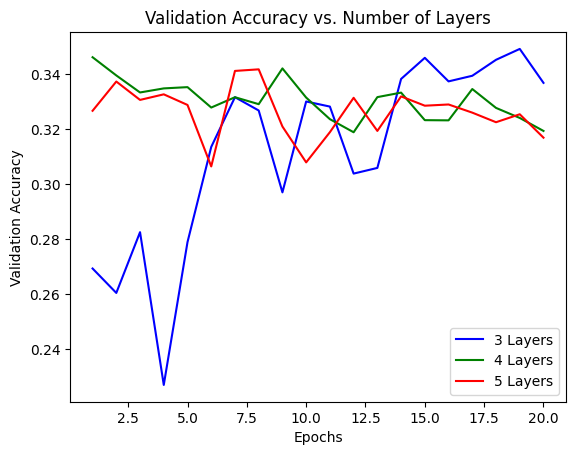

In [ ]:
import matplotlib.pyplot as plt

acc_3 = history3.history['val_categorical_accuracy']
acc_4 = history4.history['val_categorical_accuracy']
acc_5 = history5.history['val_categorical_accuracy']

epochs = range(1, len(acc_3) + 1)

plt.plot(epochs, acc_3, 'b', label='3 Layers')
plt.plot(epochs, acc_4, 'g', label='4 Layers')
plt.plot(epochs, acc_5, 'r', label='5 Layers')
plt.title('Validation Accuracy vs. Number of Layers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

Ovver 20 epochs, it was noticed that even extending deeper (appending more layers) when implementing Neural Network for the Goodread Classification task 
did not help improve the performance of the model generally. The accuracy over the iterations were almost in same range for both 4 layer and 5 layer models 
as compared to the 3 layer model that hand a faily increasing trend 

### Observing how different activations functions affect the performance for the 5 layer NN. 

In [ ]:

print('Implementing relu activation function')

#input_a = keras.layers.Input(shape=x_train.shape[1:])
h1 = keras.layers.Dense(100, activation='relu')(input)
h2 = keras.layers.Dense(100, activation='relu')(h1)
h3 = keras.layers.Dense(100, activation='relu')(h2)
h4 = keras.layers.Dense(100, activation='relu')(h3)
output_a = keras.layers.Dense(6, activation='softmax')(h4)

model_relu = keras.Model(inputs=[input], outputs=[output_a])
model_relu.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

epochs = 10
# Fit the model using the train and test datasets.

history_relu = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

print('Implementing tanh activation function')

#input_b = keras.layers.Input(shape=x_train.shape[1:])
h1 = keras.layers.Dense(100, activation='tanh')(input)
h2 = keras.layers.Dense(100, activation='tanh')(h1)
h3 = keras.layers.Dense(100, activation='tanh')(h2)
h4 = keras.layers.Dense(100, activation='tanh')(h3)
output_b = keras.layers.Dense(6, activation='softmax')(h4)

model_mix = keras.Model(inputs=[input], outputs=[output_b])
model_mix.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

epochs = 10
# Fit the model using the train and test datasets.

history_mix = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)


print('Implementing elu activation function')

#input_c = keras.layers.Input(shape=x_train.shape[1:])
h1 = keras.layers.Dense(100, activation='elu')(input)
h2 = keras.layers.Dense(100, activation='elu')(h1)
h3 = keras.layers.Dense(100, activation='elu')(h2)
h4 = keras.layers.Dense(100, activation='elu')(h3)
output_c = keras.layers.Dense(6, activation='softmax')(h4)

model_elu = keras.Model(inputs=[input], outputs=[output_c])
model_elu.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

epochs = 10
# Fit the model using the train and test datasets.

history_elu = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)


Implementing relu activation function
Epoch 1/10
3907/3907 [==============================] - 19s 5ms/step - loss: 1.4710 - categorical_accuracy: 0.3315 - val_loss: 1.5226 - val_categorical_accuracy: 0.3172
Epoch 2/10
3907/3907 [==============================] - 19s 5ms/step - loss: 1.4701 - categorical_accuracy: 0.3318 - val_loss: 1.4883 - val_categorical_accuracy: 0.3216
Epoch 3/10
3907/3907 [==============================] - 21s 5ms/step - loss: 1.4701 - categorical_accuracy: 0.3319 - val_loss: 1.4772 - val_categorical_accuracy: 0.3434
Epoch 4/10
3907/3907 [==============================] - 19s 5ms/step - loss: 1.4700 - categorical_accuracy: 0.3310 - val_loss: 1.4909 - val_categorical_accuracy: 0.3337
Epoch 5/10
3907/3907 [==============================] - 19s 5ms/step - loss: 1.4702 - categorical_accuracy: 0.3313 - val_loss: 1.4583 - val_categorical_accuracy: 0.3413
Epoch 6/10
3907/3907 [==============================] - 21s 5ms/step - loss: 1.4709 - categorical_accuracy: 0.3315 - 

### Plotting the performance while implementing different activations as seen below:

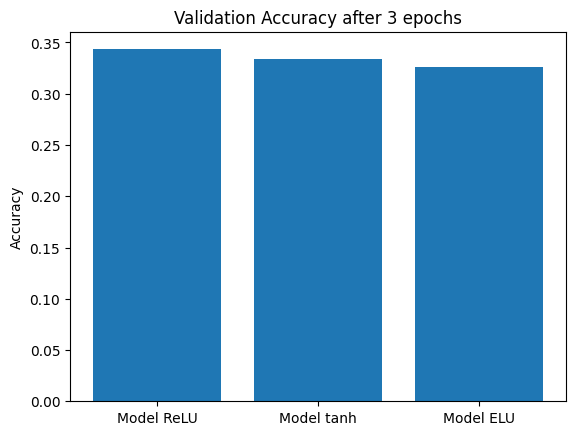

In [ ]:
import matplotlib.pyplot as plt

acc_relu = history_relu.history['val_categorical_accuracy'][:3]
acc_mix = history_mix.history['val_categorical_accuracy'][:3]
acc_elu = history_elu.history['val_categorical_accuracy'][:3]

plt.bar(['Model ReLU', 'Model tanh', 'Model ELU'], [acc_relu[-1], acc_mix[-1], acc_elu[-1]])
plt.ylabel('Accuracy')
plt.title('Validation Accuracy after 3 epochs')
plt.show()


Based on the observation on the results, it can be deduced that when implementing deeper neural networks, 
the use of the rectified linear unit (ReLu) activation function results in superior model performance compared to other activation functions.
which may be due to the fact that ReLU does not suffer from the Vanishing gradient descent problem as it has a constant gradient for positive input values
unlike using activation functions such as tanh and elu.


# Complex Neural Network 


Complex neural networks contain more complex structures and operations  as compared to the other convention models applied earlier in this report, 
enabling them to characterise complex patterns as well as relationships in data.

Recurrent neural network (RNN) types like LSTM and GRU, for instance, feature memory cells and gates that let them distinguish long-term dependencies
 in sequential input like English sentences or time series. On the contrary, the BERT type of transformer model makes use of self-attention processes
  to encode the context of each word in a phrase, which eventually produces strong language representation.

The implementation of the Complex models are shown accordingly, displaying their performance over several iterations for different configurations 

### LSTM

The libraries such as pandas, numpy, and various modules from sklearn, keras and tensorflow that have been imported at the beginning of the report are also used here.

The already cleaned data by the defined functions (emj_rem, rmvurl, and clean) were also needed and were leveraged 

Text data were also preprocessed using Tokenizer and pad_sequences functions from tensorflow

Then the Bidirectional LSTM neural network model with batch normalization and dropout layers using Keras was created for the classification.

So our model is trained the training set, validated on the validation set, before the predictions are finally generated 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 20000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(data['review_text'].tolist())

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data.review_text.tolist(), data.rating.tolist(), test_size=0.285714)

In [ ]:
## Preprocessing the text data

x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test['review_text'].tolist()) )



x_train = pad_sequences(x_train, padding='post', maxlen=40)
x_valid = pad_sequences(x_valid, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

<ipython-input-13-7ddd314c7987>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train) )
<ipython-input-13-7ddd314c7987>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
<ipython-input-13-7ddd314c7987>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, np.asarray(tf.keras.utils.to_categorical(y_train))))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, np.asarray(tf.keras.utils.to_categorical(y_valid))))

In [ ]:
## Building the model

# The accuracy metrics implemented here are categorical cross-entropy loss and categorical accuracy. 
# The number of epochs is also set to 30. 

from tensorflow.keras import regularizers
max_features =20000
embedding_dim =64
sequence_length = 40

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))                                    

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=32, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(6, activation='softmax',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

In [ ]:
epochs = 30
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3907/3907 [==============================] - 113s 24ms/step - loss: 1.2931 - categorical_accuracy: 0.4774 - val_loss: 1.2043 - val_categorical_accuracy: 0.5073
Epoch 2/30
3907/3907 [==============================] - 92s 24ms/step - loss: 1.2014 - categorical_accuracy: 0.5076 - val_loss: 1.1780 - val_categorical_accuracy: 0.5172
Epoch 3/30
3907/3907 [==============================] - 93s 24ms/step - loss: 1.1815 - categorical_accuracy: 0.5166 - val_loss: 1.2049 - val_categorical_accuracy: 0.5029
Epoch 4/30
3907/3907 [==============================] - 93s 24ms/step - loss: 1.1696 - categorical_accuracy: 0.5224 - val_loss: 1.1622 - val_categorical_accuracy: 0.5249
Epoch 5/30
3907/3907 [==============================] - 92s 24ms/step - loss: 1.1622 - categorical_accuracy: 0.5265 - val_loss: 1.1588 - val_categorical_accuracy: 0.5271
Epoch 6/30
3907/3907 [==============================] - 92s 24ms/step - loss: 1.1564 - categorical_accuracy: 0.5294 - val_loss: 1.1566 - val_categorical_accurac

In [ ]:
predictions = model.predict(x_test)
predictions_res = predictions.argmax(axis=1)
print(predictions_res)

6250/6250 [==============================] - 39s 6ms/step
[3 5 5 ... 4 4 4]


In [ ]:
predictions_results = pd.DataFrame(test['review_id'], columns=['review_id'])

In [ ]:
predictions_results2 = pd.DataFrame(predictions_res, columns=['rating'])

In [ ]:
predictions_results = pd.concat([predictions_results, predictions_results2], axis=1)

In [ ]:
predictions_results

,review_id,rating
0,16c32b9bb0142734c60f8b028f281c5dd,3
1,1f86ec340856f1097c922d33aed48d4ea,5
2,14a20b34f27611e45bd75e24de6a06324,5
3,1b2e5b069e4f440d152ae6d48e3f111ac,4
4,132aec4dfb13a2f8032a7431023dd728f,3
...,...,...
199995,1e65b0ab60fb0fc5361da7c3a7a45bc2a,4
199996,176c31b9581191138cc477b0df2f82b09,3
199997,17af2bb1902e2b7f6a5004e7bbe285139,4
199998,1e13fa3ce7e49dfd190bd0a02c36efe61,4


In [ ]:
predictions_results.to_csv('results.csv', index=False)

# GRU (Gated recurrent unit)




The libraries and modules that have been imported at the beginning of the report are also used here.

The already cleaned data by the defined functions (emj_rem, rmvurl, and clean) were also needed and were leveraged to clean the test and training data

Text data were also preprocessed using Tokenizer and pad_sequences functions from tensorflow

Then the GRU model with dropout layers using Keras was created for the classification.

The model is:

* trained on the training set
* validated on the validation set 
* And predictions are finally generated

In [ ]:
## Cleaning the training data

data['words_num'] = data.review_text.apply(lambda y:len(str(y).split()))
train_max_length = data['words_num'].max()

data.review_text = data.review_text.apply(emj_rem)
data.review_text = data.review_text.apply(rmvurl)
data.review_text = data.review_text.apply(clean)

In [ ]:
## Cleaning the test data

test['words_num'] = test.review_text.apply(lambda y:len(str(y).split()))
test_max_length = test['words_num'].max()

test.review_text = test.review_text.apply(emj_rem)
test.review_text = test.review_text.apply(rmvurl)
test.review_text = test.review_text.apply(clean)

In [ ]:
print('Training data has highest length of: ', train_max_length)
print('Testing data has highest length of: ', test_max_length)

Training data has highest length of:  3493
Testing data has highest length of:  2953


In [ ]:
# The text is pre processed using the tokenizer and the pad_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 20000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(data['review_text'].tolist())

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data.review_text.tolist(), data.rating.tolist(), test_size=0.285714)

In [ ]:
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test['review_text'].tolist()) )



x_train = pad_sequences(x_train, padding='post', maxlen=40)
x_valid = pad_sequences(x_valid, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

<ipython-input-13-7ddd314c7987>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train) )
<ipython-input-13-7ddd314c7987>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
<ipython-input-13-7ddd314c7987>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, np.asarray(tf.keras.utils.to_categorical(y_train))))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, np.asarray(tf.keras.utils.to_categorical(y_valid))))

In [ ]:
## Building the model

from tensorflow.keras import regularizers
max_features =20000
embedding_dim =64
sequence_length = 40

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))    
model.add(tf.keras.layers.Dropout(0.2))                                

model.add(tf.keras.layers.GRU(units=64))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(6, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

In [ ]:
epochs = 30
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3907/3907 [==============================] - 43s 9ms/step - loss: 1.2747 - categorical_accuracy: 0.4692 - val_loss: 1.2345 - val_categorical_accuracy: 0.4846
Epoch 2/30
3907/3907 [==============================] - 33s 8ms/step - loss: 1.2248 - categorical_accuracy: 0.4932 - val_loss: 1.2066 - val_categorical_accuracy: 0.5021
Epoch 3/30
3907/3907 [==============================] - 33s 8ms/step - loss: 1.2137 - categorical_accuracy: 0.5017 - val_loss: 1.1987 - val_categorical_accuracy: 0.5086
Epoch 4/30
3907/3907 [==============================] - 31s 8ms/step - loss: 1.2070 - categorical_accuracy: 0.5062 - val_loss: 1.1943 - val_categorical_accuracy: 0.5125
Epoch 5/30
3907/3907 [==============================] - 33s 8ms/step - loss: 1.2028 - categorical_accuracy: 0.5091 - val_loss: 1.1894 - val_categorical_accuracy: 0.5151
Epoch 6/30
3907/3907 [==============================] - 33s 8ms/step - loss: 1.2004 - categorical_accuracy: 0.5107 - val_loss: 1.1906 - val_categorical_accuracy: 0.51

# BERT

BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained deep learning model which can be fine-tuned
on tasks such as language generation and classification (which is being worked on in this report)

The libraries and modules that have been imported at the beginning of the report are implemented here also.

The code creates TensorFlow datasets from the preprocessed data and uses the BERT model to classify reviews by rating using 
a softmax activation function and sparse categorical cross-entropy loss function. 

The model finally is compiled with an "adam" optimizer, a 'sparse_categorical_crossentropy' loss and the "accuracy" metrics. 
It is trained using the training data and evaluated using the validation and testing data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("drive/MyDrive/mydata/my_goodreads_train.csv")
test = pd.read_csv("drive/MyDrive/mydata/my_goodreads_test.csv")

data_bert = pd.concat([data.review_text, data.rating], axis=1)
data_bert

data_df, val_df = train_test_split(data_bert, test_size=0.285714)

test_df = test.review_text

import re
import string
def emj_rem(txt):
  emj = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emj.sub(r'', txt)

def rmvurl(txt): 
    url  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url.sub(r'', txt)

def clean(txt): 
    del_dic = {sp_character: '' for sp_character in string.punctuation} 
    del_dic[' '] = ' ' 
    tab = str.maketrans(del_dic)
    txt1 = txt.translate(tab)
    txtAr= txt1.split()
    text2 = ' '.join([w for w in txtAr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()


test_df = pd.DataFrame(test_df, columns=['review_text'])

data_df.review_text = data_df.review_text.apply(emj_rem)
data_df.review_text = data_df.review_text.apply(rmvurl)
data_df.review_text = data_df.review_text.apply(clean)

val_df.review_text = val_df.review_text.apply(emj_rem)
val_df.review_text = val_df.review_text.apply(rmvurl)
val_df.review_text = val_df.review_text.apply(clean)

test_df.review_text = test_df.review_text.apply(emj_rem)
test_df.review_text = test_df.review_text.apply(rmvurl)
test_df.review_text = test_df.review_text.apply(clean)

import tensorflow as tf

batch_size = 32

# create TensorFlow datasets from the Pandas dataframes
data_ds = tf.data.Dataset.from_tensor_slices((data_df[['review_text', 'rating']].to_dict('list')))
val_ds = tf.data.Dataset.from_tensor_slices((val_df[['review_text', 'rating']].to_dict('list')))
test_ds = tf.data.Dataset.from_tensor_slices((test_df[['review_text']].to_dict('list')))

# shuffle and batch the datasets
data_ds = data_ds.shuffle(len(data_df))
data_ds = data_ds.batch(batch_size)
data_ds = data_ds.map(lambda x: ({'text': x['review_text']}, x['rating']))

val_ds = val_ds.batch(batch_size)
val_ds = val_ds.map(lambda x: ({'text': x['review_text']}, x['rating']))

test_ds = test_ds.batch(batch_size)
test_ds = test_ds.map(lambda x: ({'text': x['review_text']}))



# import tensorflow_hub as hub
# !pip install tensorflow_text
# import tensorflow_text as text

# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', name='preprocessing')
# encoder_inputs = bert_preprocess_model(text_input)
# bert_model = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1', trainable=True, name='BERT_encoder')
# outputs = bert_model(encoder_inputs)
# net = outputs['pooled_output']
# net = tf.keras.layers.Dropout(0.1)(net)
# net = tf.keras.layers.Dense(6, activation='softmax', name='classifier')(net)
# model = tf.keras.Model(text_input, net)
# model.summary()



###


import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow_text
import tensorflow_text as text


# define the input layer
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

# define the preprocessing layer using BERT
bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', name='preprocessing')
encoder_inputs = bert_preprocess_model(text_input)

# define the BERT layer
bert_model = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1', trainable=True, name='BERT_encoder')
outputs = bert_model(encoder_inputs)

# add dropout layer
net = outputs['pooled_output']
net = tf.keras.layers.Dropout(0.1)(net)

# define the output layer
output = tf.keras.layers.Dense(6, activation='softmax', name='output')(net)

# define the model
model = tf.keras.Model(inputs=text_input, outputs=output)

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 51.4 MB/s eta 0:00:00


In [ ]:
model.fit(x=data_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
15625/15625 [==============================] - 4423s 281ms/step - loss: 1.4683 - accuracy: 0.3316 - val_loss: 1.4395 - val_accuracy: 0.3482
Epoch 2/5
15625/15625 [==============================] - 4296s 275ms/step - loss: 1.4422 - accuracy: 0.3443 - val_loss: 1.4397 - val_accuracy: 0.3482
Epoch 3/5
15625/15625 [==============================] - 4285s 274ms/step - loss: 1.4394 - accuracy: 0.3467 - val_loss: 1.4632 - val_accuracy: 0.2943
Epoch 4/5
15625/15625 [==============================] - 4279s 274ms/step - loss: 1.4378 - accuracy: 0.3473 - val_loss: 1.4692 - val_accuracy: 0.2943
Epoch 5/5
15625/15625 [==============================] - 4240s 271ms/step - loss: 1.4370 - accuracy: 0.3477 - val_loss: 1.4511 - val_accuracy: 0.3482


For BERT, it took about 5 hours to run just 5 iterations which was still about 35% accuracy

It is a very large and complex model that requires significant computational resources to train which might also require high-end hardware to utilize and mazimize its efficiency.